In [1]:
from gensim.models import KeyedVectors
import random
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
word2vec_100 = KeyedVectors.load('word2vec_100_3_polish.bin')
'word2vec dim 100 loaded'

'word2vec dim 100 loaded'

In [5]:
word2vec_300 = KeyedVectors.load('word2vec_300_3_polish.bin')
'word2vec dim 300 loaded'

'word2vec dim 300 loaded'

In [38]:
#zad 3, 4
words = ['kpk', 'szkoda', 'wypadek', 'kolizja', 'nieszczęście', 'rozwód']

def find_top_5_from_word(words, model):
    out = {}
    for w in words:
        out[w] = model.most_similar(w, topn=5)
    return out

In [67]:
top_5_words_100 = find_top_5_from_word(words, word2vec_100)
top_5_words_300 = find_top_5_from_word(words, word2vec_300)
top_5_words = {k : {'dim100' : top_5_words_100[k], 'dim300' : top_5_words_300[k]} for k in top_5_words_100.keys()}
top_5_words

c:\users\marcins\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


{'kpk': {'dim100': [('kilopond', 0.6665806770324707),
   ('kpzs', 0.6363496780395508),
   ('kpu', 0.6300562024116516),
   ('sownarkomu', 0.6254925727844238),
   ('wcik', 0.6224358677864075)],
  'dim300': [('ksh', 0.5774794220924377),
   ('cywilnego', 0.5498510599136353),
   ('postępowania', 0.5285828113555908),
   ('kilopond', 0.5151568055152893),
   ('kkkw', 0.48344212770462036)]},
 'szkoda': {'dim100': [('krzywda', 0.6817898750305176),
   ('pożytek', 0.6121943593025208),
   ('strata', 0.5968126654624939),
   ('ryzyko', 0.5745570659637451),
   ('uszczerbek', 0.5639551877975464)],
  'dim300': [('uszczerbek', 0.6027276515960693),
   ('krzywda', 0.5920778512954712),
   ('strata', 0.550269365310669),
   ('despekt', 0.5382484197616577),
   ('pożytek', 0.531347393989563)]},
 'wypadek': {'dim100': [('przypadek', 0.7544811964035034),
   ('okoliczności', 0.7268072366714478),
   ('padku', 0.6788284182548523),
   ('incydent', 0.6418948173522949),
   ('zdarzenie', 0.6114422082901001)],
  'dim300'

In [42]:
expressions = ['sąd najwyższy', 'trybunał konstytucyjny', 'szkoda majątkowy', 'kodeks cywilny', 'sąd rejonowy']

def expr_to_dict(expressions,models):
    model_dicts =[]
    for model in models:
        exp_dict ={}
        for e in expressions:
            exp_dict[e] = []
            words = e.split(' ')
            for w in words:
                exp_dict[e].append(model.wv[w])
        model_dicts.append(exp_dict)
    return tuple(model_dicts)
vec_exp_100,vec_exp_300 = expr_to_dict(expressions,(word2vec_100,word2vec_300))

c:\users\marcins\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [43]:
#zad 5, 6
def find_top_7_from_expr(exprs_dict,model):
    out = {}
    for expr, vec_list in exprs_dict.items():
        avg_vec = np.mean(vec_list,axis=0)
        out[expr] = model.similar_by_vector(avg_vec, topn=7)
    return out

In [44]:
top_7_100 = find_top_7_from_expr(vec_exp_100, word2vec_100)
top_7_300 = find_top_7_from_expr(vec_exp_300, word2vec_300)
top_7 = {k : {'dim100' : top_7_100[k], 'dim300' : top_7_300[k]} for k in top_7_100.keys()}
top_7

c:\users\marcins\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  


{'sąd najwyższy': {'dim100': [('sąd', 0.8644266128540039),
   ('trybunał', 0.7672435641288757),
   ('najwyższy', 0.7527138590812683),
   ('trybunat', 0.6843459010124207),
   ('sędzia', 0.6718415021896362),
   ('areopag', 0.6571060419082642),
   ('sprawiedliwość', 0.6562486886978149)],
  'dim300': [('sąd', 0.8261206150054932),
   ('trybunał', 0.711520791053772),
   ('najwyższy', 0.7068409323692322),
   ('sędzia', 0.6023203730583191),
   ('sądowy', 0.5670486688613892),
   ('trybunat', 0.5525928735733032),
   ('sprawiedliwość', 0.5319530367851257)]},
 'trybunał konstytucyjny': {'dim100': [('trybunał', 0.9073251485824585),
   ('konstytucyjny', 0.7998723387718201),
   ('sąd', 0.7972990274429321),
   ('bunał', 0.7729247808456421),
   ('senat', 0.7585273385047913),
   ('bunału', 0.7441976070404053),
   ('trybunat', 0.7347140908241272)],
  'dim300': [('trybunał', 0.8845913410186768),
   ('konstytucyjny', 0.7739969491958618),
   ('sąd', 0.7300779819488525),
   ('trybunat', 0.6758428812026978),


In [68]:
#zad 7
expressions2 = ["sąd konstytucja kpk", "pasażer kobieta mężczyzna", "pilot kobieta mężczyzna", "lekarz kobieta mężczyzna",
                "nauczycielka mężczyzna kobieta", "przedszkolanka mężczyzna kobieta", "samochód rzeka droga"]


vec_exp2_100,vec_exp2_300 = expr_to_dict(expressions2,(word2vec_100,word2vec_300))

c:\users\marcins\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [69]:
def find_top_5_algebraic(exprs_dict, model):
    out = {}
    for expr, vec_list in exprs_dict.items():
        alg_vec = vec_list[0]+ vec_list[1] - vec_list[2]
        out[expr] = model.similar_by_vector(alg_vec, topn=5)
    return out
   


In [70]:
top_5_100 = find_top_5_algebraic(vec_exp2_100, word2vec_100)
top_5_300 = find_top_5_algebraic(vec_exp2_300, word2vec_300)
top_5 = {k : {'dim100' : top_5_100[k], 'dim300' : top_5_300[k]} for k in top_5_100.keys()}
top_5


c:\users\marcins\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """


{'sąd konstytucja kpk': {'dim100': [('sąd', 0.8484209775924683),
   ('konstytucja', 0.8322000503540039),
   ('trybunał', 0.7756364345550537),
   ('ustawa', 0.768037736415863),
   ('dekret', 0.7208969593048096)],
  'dim300': [('sąd', 0.8255324363708496),
   ('konstytucja', 0.798995852470398),
   ('trybunał', 0.7041962146759033),
   ('ustawa', 0.6793721914291382),
   ('dekret', 0.6163084506988525)]},
 'pasażer kobieta mężczyzna': {'dim100': [('pasażer', 0.8446224927902222),
   ('pasażerka', 0.722925066947937),
   ('stewardessa', 0.629162073135376),
   ('stewardesa', 0.6267591714859009),
   ('taksówka', 0.6172000765800476)],
  'dim300': [('pasażer', 0.794208288192749),
   ('pasażerka', 0.6724309325218201),
   ('stewardesa', 0.5788161158561707),
   ('stewardessa', 0.563020646572113),
   ('podróżny', 0.4986627697944641)]},
 'pilot kobieta mężczyzna': {'dim100': [('pilot', 0.7940387725830078),
   ('nawigator', 0.6515690088272095),
   ('pilotka', 0.6387545466423035),
   ('oblatywacz', 0.63495

In [53]:
#zad 8
words2 = ['szkoda', 'strata', 'uszczerbek', 'krzywda', 'niesprawiedliwość',
          'nieszczęście', 'kobieta', 'mężczyzna', 'pasażer',
          'pasażerka', 'student', 'studentka', 'lekarz','lekarka']

words2_vec_100 = [word2vec_100.wv[w] for w in words2]
words2_vec_300 = [word2vec_300.wv[w] for w in words2]

c:\users\marcins\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [64]:
characters = 'aąbcćdeęfghijklłmnńoópqrsśtuvwyxzźż'
def f_word(word):
    if len(word) == 0:
        return False
    for c in word:
        if c not in characters:
            return False
    return True

def random_words(model): 
    all_words = [w for w in list(model.wv.vocab) if f_word(w)]
    random_words = random.sample(all_words, k=1000)
    random_wv = [model.wv[w] for w in random_words]
    return random_wv 

def plot_tsne(t):   
    #colors for random words
    colors = []
    colors += ['grey' for x in range(1000)]
    #here i'll admit to borrowing collor splitting idea since it is done perferctly
    #colours for szkoda, strata, uszczerbek, krzywda, niesprawiedliwość, nieszczęście
    colors += ['red' for x in range(6)]
    #colors for kobieta, mezczyzna
    colors += ['green' for x in range(2)]
    #colors for pasażer, pasażerka
    colors += ['blue' for x in range(2)]
    #colors for student, studentka
    colors += ['pink' for x in range(2)]
    #colors for lekarz, lekarka
    colors += ['black' for x in range(2)]
    plt.figure(figsize=(16, 16))
    
    plt.scatter(t[:,0], t[:,1], c=colors)
    
    plt.show()

c:\users\marcins\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()
c:\users\marcins\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


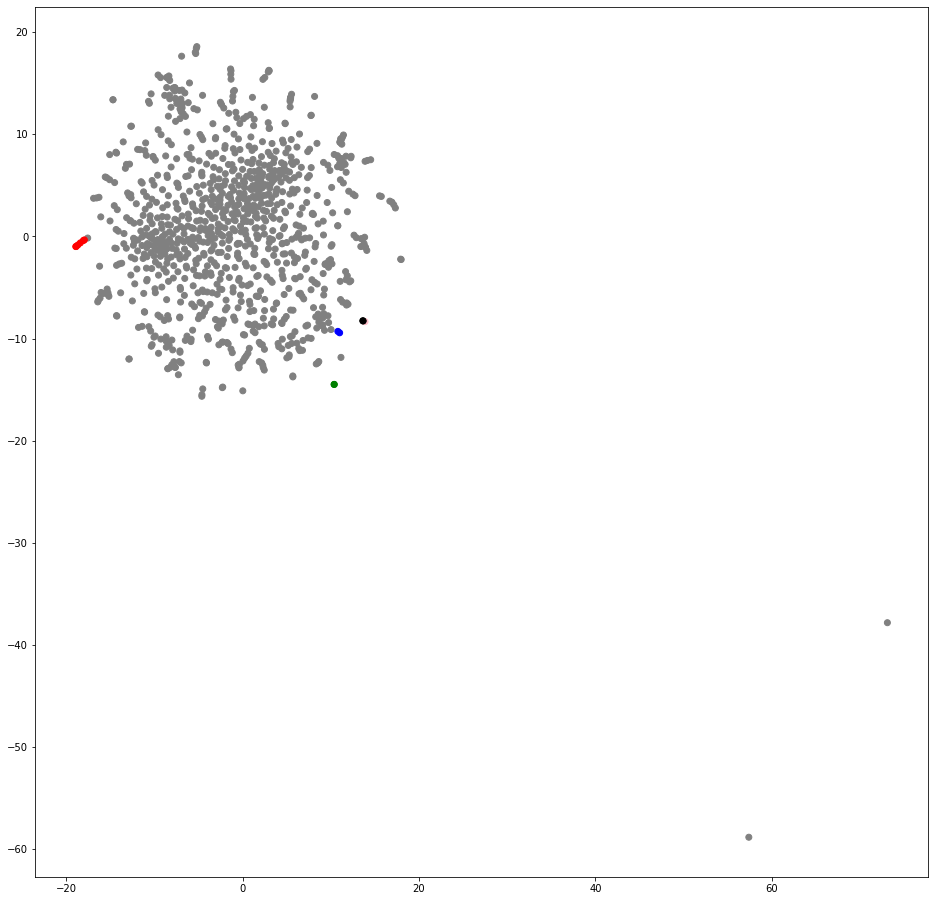

In [65]:
rw = random_words(word2vec_100)
tsne = TSNE().fit_transform(np.array(rw+words2_vec_100))
plot_tsne(tsne)

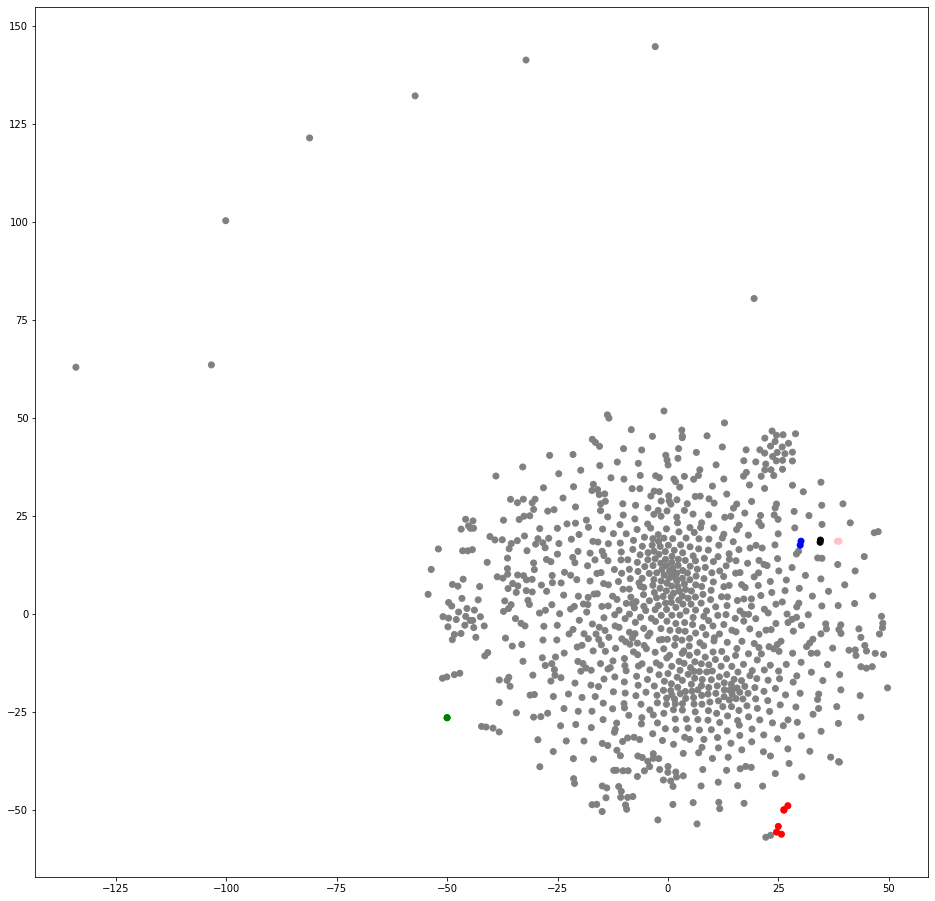

In [66]:
rw = random_words(word2vec_300)
tsne = TSNE().fit_transform(np.array(rw+words2_vec_300))
plot_tsne(tsne)

# zad 9
### 1 Compare results for all experiments with respect to the employed models (100 and 300-d)?

##### in single word expression for example kpk 300dim version worked better. But for 2 word expression  like 'kodeks cywilny' suprisingly dim 100 had better results. In most cases however they were comparable both versions having it's quircks here and there

### Compare results for singe words and MWEs

##### it's hard to compare fidning single words similarities to other single words and to expressions, as  expressions seem to be more specific. While for single words results were really good they felt obviously less precise for MWE. on the other hand even namley choosing similar words to expression would yield similar results, so that implies that problems lie in task itself rather than solution. Also sometimes those words matched were seemingly not matched to expression but to words in this expression. 

### How the results for MWEs could be improved
##### We compressed expresion to mean of words. That would take assumption that words have the same weight in the expression, when usually one of them seems to be rather dominant. in 'sąd rejonowy' many thing can be 'rejonowy' but not so many things can be 'sąd' so maybe shifting focus from 'rejony' to 'sad' would give better results, by adding weighted means.

### Are the results for albegraic operations biased?
##### it seems so, for example in 'pasazer + kobieta - mezczyzna' it shoudl not return 'pasazer' as we tried to exclude 'mezczyzna'. 

### According to t-SNE: do representations of similar word cluster together
##### if we look at colored words (our word clustered by meaning and depicted as the same color) it does seem that they are very near eachother. That seems to prove that vector representation does posses similar spacial information for different words as obviosuly t-SNE algorithm does not know meaning behind this vectors. This is a very good suggestion that this representation fulfills it's purpose